<a href="https://colab.research.google.com/github/itsZENR/Binance_LSTM/blob/main/Binance_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое задание:

Цель: разработать скрипт для сбора и обработки данных с использованием API Binance и прогнозирования временных рядов с помощью LSTM-модели.

Этапы выполнения задания:

1. Изучить документацию RESTful API Binance (https://binance-docs.github.io/apidocs/spot/en/) и написать скрипт на Python с использованием библиотеки Requests, чтобы получить данные о котировках криптовалют. Сохранить полученные данные в формате CSV.

2. Загрузить полученный CSV-файл с данными в Python с использованием библиотеки Pandas и выполнить предварительную обработку данных (например, удаление пропусков, преобразование даты и времени, масштабирование).

3. С использованием библиотеки NumPy, разделить данные на обучающую и тестовую выборки.

4. Создать и обучить LSTM-модель с использованием библиотеки Keras или TensorFlow на основе подготовленных данных. Подобрать архитектуру и гиперпараметры модели, чтобы достичь наилучшего качества прогнозирования.

5. Оценить качество модели на тестовой выборке, используя подходящие метрики, такие как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE).

6. Визуализировать предсказания модели для тестовой выборки на графике с помощью библиотеки Matplotlib или Plotly. Вывести график с предсказанием на час вперед от последних полученных данных.

# Требования к выполнению задания:

Использовать Python 3.x и стандартные библиотеки, такие как Requests, для работы с API Binance

В качестве хранилища данных использовать файлы в формате CSV

Для обработки и подготовки данных использовать библиотеки Pandas и NumPy

Для создания и обучения LSTM-модели использовать библиотеку Keras или TensorFlow

В качестве инструмента для визуализации результатов использовать библиотеку Matplotlib или Plotly

Качество/точность предсказания не является основным критерием оценки выполнения задания, но стажер должен стремиться к наилучшему результату

Стараться уложиться в 200 строк кода.

# Тестовое задание

In [32]:
#@title Библиотеки
import pandas as pd
import numpy as np
import requests
import csv
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [2]:
# Указываем адрес RESTful API Binance и параметры запроса для получения исторических данных о котировках
url = "https://api.binance.com/api/v3/klines"
params = {
    "symbol": "BTCUSDT", # Мы получим данные о котировках пары BTC/USDT
    "interval": "1d", # Мы будем запрашивать данные за каждый день
    "startTime": int((datetime.datetime.now() - datetime.timedelta(days=365)).timestamp() * 1000), # Мы указываем время начала периода - прошлый год
    "endTime": int(datetime.datetime.now().timestamp() * 1000) # Мы указываем текущее время как время окончания периода
}

# Выполняем запрос к API и получаем ответ в формате JSON
response = requests.get(url, params=params)
data = response.json()

# Создаем CSV-файл и записываем в него полученные данные
with open("binance_quotes.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["time", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"]) # Записываем заголовки столбцов
    for row in data:
        writer.writerow(row) # Записываем данные в столбцы


In [21]:
# Загружаем CSV-файл с данными и преобразуем данные в DataFrame
df = pd.read_csv("binance_quotes.csv")
df

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1649462400000,42252.02,42800.00,42125.48,42753.97,17891.66047,1649548799999,7.592746e+08,640230,8910.47179,3.781580e+08,0
1,1649548800000,42753.96,43410.30,41868.00,42158.85,22771.09403,1649635199999,9.714597e+08,678983,10952.24952,4.674388e+08,0
2,1649635200000,42158.85,42414.71,39200.00,39530.45,63560.44721,1649721599999,2.602039e+09,1385924,30543.05561,1.251713e+09,0
3,1649721600000,39530.45,40699.00,39254.63,40074.94,57751.01778,1649807999999,2.309514e+09,1153667,28344.99788,1.133659e+09,0
4,1649808000000,40074.95,41561.31,39588.54,41147.79,41342.27254,1649894399999,1.677171e+09,948061,20522.54699,8.326534e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1680566400000,27800.00,28444.44,27662.79,28165.47,49722.55691,1680652799999,1.397141e+09,1102007,25083.95234,7.048454e+08,0
361,1680652800000,28165.47,28775.00,27805.10,28170.01,60737.64732,1680739199999,1.721099e+09,1262730,30556.88672,8.659711e+08,0
362,1680739200000,28170.01,28182.05,27711.00,28033.82,40118.94963,1680825599999,1.122713e+09,934548,19308.64369,5.403843e+08,0
363,1680825600000,28033.83,28100.00,27766.94,27906.33,24762.09387,1680911999999,6.913237e+08,655634,11983.13367,3.345595e+08,0


In [22]:
# Проверяем, есть ли пропущенные значения в данных
print(df.isnull().sum())

time                            0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64


In [23]:
# Преобразуем столбец "time" в формат даты и времени
df["time"] = pd.to_datetime(df["time"], unit="ms")
df

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2022-04-09,42252.02,42800.00,42125.48,42753.97,17891.66047,1649548799999,7.592746e+08,640230,8910.47179,3.781580e+08,0
1,2022-04-10,42753.96,43410.30,41868.00,42158.85,22771.09403,1649635199999,9.714597e+08,678983,10952.24952,4.674388e+08,0
2,2022-04-11,42158.85,42414.71,39200.00,39530.45,63560.44721,1649721599999,2.602039e+09,1385924,30543.05561,1.251713e+09,0
3,2022-04-12,39530.45,40699.00,39254.63,40074.94,57751.01778,1649807999999,2.309514e+09,1153667,28344.99788,1.133659e+09,0
4,2022-04-13,40074.95,41561.31,39588.54,41147.79,41342.27254,1649894399999,1.677171e+09,948061,20522.54699,8.326534e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-04-04,27800.00,28444.44,27662.79,28165.47,49722.55691,1680652799999,1.397141e+09,1102007,25083.95234,7.048454e+08,0
361,2023-04-05,28165.47,28775.00,27805.10,28170.01,60737.64732,1680739199999,1.721099e+09,1262730,30556.88672,8.659711e+08,0
362,2023-04-06,28170.01,28182.05,27711.00,28033.82,40118.94963,1680825599999,1.122713e+09,934548,19308.64369,5.403843e+08,0
363,2023-04-07,28033.83,28100.00,27766.94,27906.33,24762.09387,1680911999999,6.913237e+08,655634,11983.13367,3.345595e+08,0


In [24]:
# Масштабируем данные с помощью MinMaxScaler
scaler = MinMaxScaler()
df[["open", "high", "low", "close", "volume", "quote_asset_volume", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume"]] = scaler.fit_transform(df[["open", "high", "low", "close", "volume", "quote_asset_volume", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume"]])
df

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2022-04-09,0.981391,0.977476,1.000000,1.000000,0.009697,1649548799999,0.026895,640230,0.009344,0.026089,0
1,2022-04-10,1.000000,1.000000,0.990338,0.977936,0.016202,1649635199999,0.039255,678983,0.014872,0.036433,0
2,2022-04-11,0.977937,0.963256,0.890224,0.880489,0.070581,1649721599999,0.134234,1385924,0.067919,0.127301,0
3,2022-04-12,0.880490,0.899935,0.892274,0.900676,0.062836,1649807999999,0.117195,1153667,0.061967,0.113623,0
4,2022-04-13,0.900677,0.931760,0.904803,0.940452,0.040961,1649894399999,0.080362,948061,0.040786,0.078748,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-04-04,0.445588,0.447658,0.457299,0.459138,0.052133,1680652799999,0.064050,1102007,0.053137,0.063940,0
361,2023-04-05,0.459138,0.459858,0.462639,0.459306,0.066818,1680739199999,0.082920,1262730,0.067956,0.082608,0
362,2023-04-06,0.459306,0.437974,0.459108,0.454257,0.039330,1680825599999,0.048065,934548,0.037499,0.044885,0
363,2023-04-07,0.454258,0.434946,0.461207,0.449530,0.018856,1680911999999,0.022937,655634,0.017664,0.021038,0


In [19]:
# Выводим сводку статистических показателей
df.describe()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,3.650000e+02,365.000000,365.000000,365.0
mean,0.279264,0.276957,0.273206,0.277817,0.261725,1.665274e+12,0.242054,4.804729e+06,0.264143,0.239038,0.0
std,0.231770,0.235650,0.226514,0.229007,0.180151,9.116121e+09,0.166966,3.030927e+06,0.183049,0.166418,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.649549e+12,0.000000,2.950760e+05,0.000000,0.000000,0.0
25%,0.131216,0.124079,0.130955,0.131188,0.115063,1.657411e+12,0.114070,1.704217e+06,0.115319,0.113299,0.0
50%,0.212638,0.205681,0.203161,0.212597,0.235417,1.665274e+12,0.205717,4.789109e+06,0.236397,0.203099,0.0
75%,0.328138,0.329762,0.325422,0.328134,0.364075,1.673136e+12,0.341851,6.519330e+06,0.367235,0.334330,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.680998e+12,1.000000,1.522359e+07,1.000000,1.000000,0.0


In [122]:
# Разделяем данные на обучающую и тестовую выборки
x = df.drop("close", axis=1) # X - матрица признаков, исключая целевую переменную "close"
y = df["close"] # y - целевая переменная "close"
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Проверяем размерности данных
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (292, 11)
y_train shape: (292,)
X_test shape: (73, 11)
y_test shape: (73,)


In [ ]:
# Загрузка данных из CSV-файла
df = pd.read_csv("binance_quotes.csv")
dataset = df["close"].values.reshape(-1, 1)

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Функция для создания временных последовательностей
def create_sequences(dataset, look_back=1):
    x, y = [], []
    for i in range(len(dataset) - look_back):
        x.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(x), np.array(y)

# Создание последовательностей для обучения и тестирования
look_back = 60
x_train, y_train = create_sequences(train_data, look_back)
x_test, y_test = create_sequences(test_data, look_back)

# Изменение формы данных для подачи в модель LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Определение архитектуры LSTM-модели
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(x_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000

8/8 [==============================] - 8s 93ms/step - loss: 0.0149

Epoch 2/1000

8/8 [==============================] - 1s 96ms/step - loss: 0.0067

Epoch 3/1000

8/8 [==============================] - 1s 98ms/step - loss: 0.0050

Epoch 4/1000

8/8 [==============================] - 1s 92ms/step - loss: 0.0049

Epoch 5/1000

8/8 [==============================] - 1s 92ms/step - loss: 0.0053

...

Epoch 996/1000

8/8 [==============================] - 1s 159ms/step - loss: 6.9754e-04

Epoch 997/1000

8/8 [==============================] - 1s 125ms/step - loss: 6.6723e-04

Epoch 998/1000

8/8 [==============================] - 1s 100ms/step - loss: 5.7495e-04

Epoch 999/1000

8/8 [==============================] - 1s 101ms/step - loss: 5.8196e-04

Epoch 1000/1000

8/8 [==============================] - 1s 100ms/step - loss: 5.8330e-04


In [124]:
# Оценка
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

1/1 [==============================] - 0s 40ms/step


In [125]:
# Вычисление среднеквадратичного отклонения
train_rmse = np.sqrt(np.square(np.subtract(y_train,train_predict)).mean())
test_rmse = np.sqrt(np.square(np.subtract(y_test,test_predict)).mean())
print("Среднеквадратичное отклонение на обучающей выборке: %.2f" % train_rmse)
print("Среднеквадратичное отклонения на тестовой выборке: %.2f" % test_rmse)

Среднеквадратичное отклонение на обучающей выборке: 3572.96
Среднеквадратичное отклонения на тестовой выборке: 1121.25


In [126]:
# Вычисление среднеквадратичной ошибки
train_mse = np.square(np.subtract(y_train,train_predict)).mean()
test_mse = np.square(np.subtract(y_test,test_predict)).mean()
print("Среднеквадратичная ошибка на обучающей выборке: %.2f" % train_mse)
print("Среднеквадратичная ошибка на тестовой выборке: %.2f" % test_mse)

Среднеквадратичная ошибка на обучающей выборке: 12766078.60
Среднеквадратичная ошибка на тестовой выборке: 1257203.54


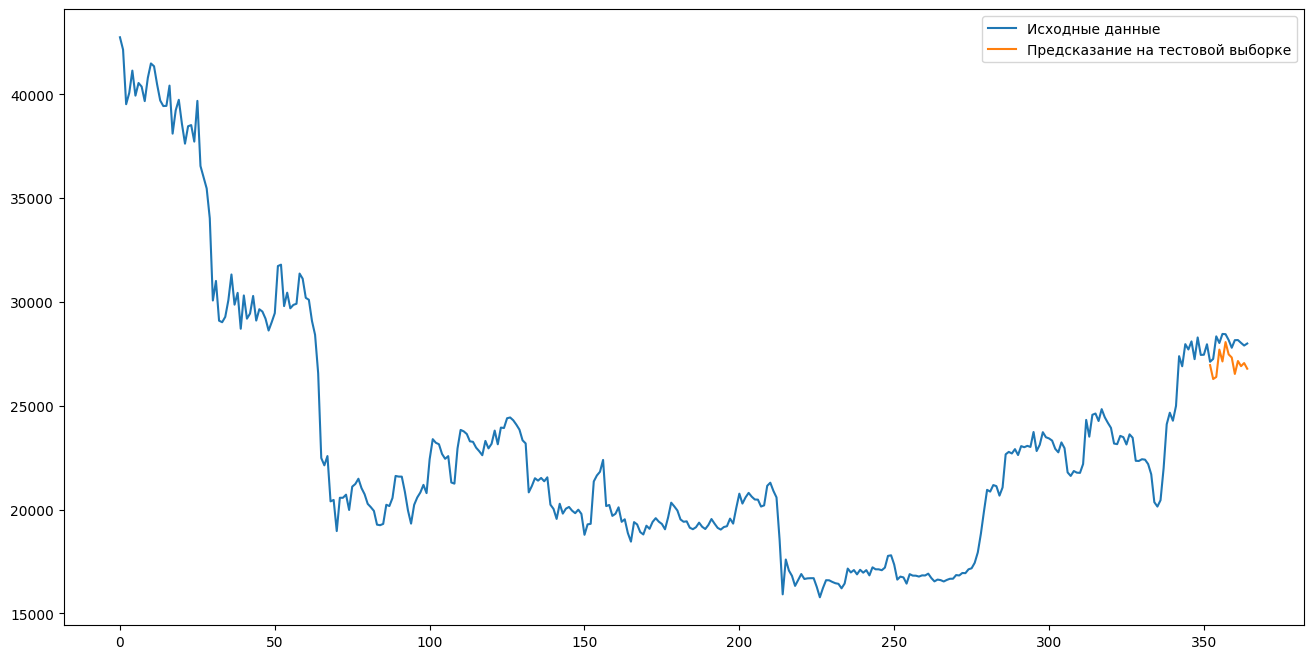

In [127]:
# Подготовка данных для построения графика
predictions = np.empty_like(dataset)
predictions[:, :] = np.nan
predictions[len(dataset) - len(test_predict):, :] = test_predict

# Построение графика
plt.figure(figsize=(16, 8))
plt.plot(dataset, label='Исходные данные')
plt.plot(predictions, label='Предсказание на тестовой выборке')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step
Значение закрытия ставки через один час: [[27574.46]]


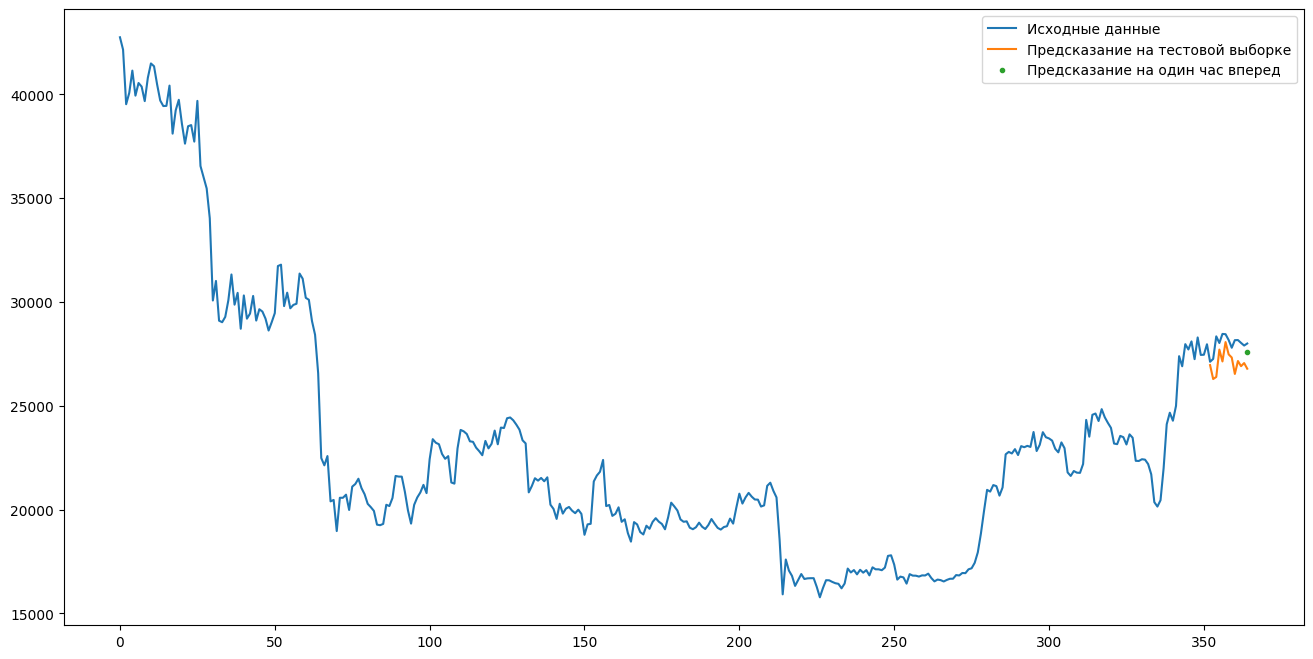

In [128]:
n_steps = 10

# Подготовка данных для предсказания на один час вперед
last_data = dataset[-n_steps:]
last_data = scaler.transform(last_data.reshape(-1, 1))
last_data = last_data.reshape(1, n_steps, 1)

# Получение предсказания на один час вперед
one_hour_prediction = model.predict(last_data)
one_hour_prediction = scaler.inverse_transform(one_hour_prediction)
print("Значение закрытия ставки через один час:", one_hour_prediction)

# Построение графика с предсказанием на один час вперед
plt.figure(figsize=(16, 8))
plt.plot(dataset, label='Исходные данные')
plt.plot(predictions, label='Предсказание на тестовой выборке')
plt.plot(len(dataset) - 1, one_hour_prediction, 'o', markersize=3, label='Предсказание на один час вперед')
plt.legend()
plt.show()